<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/Jupyter_Notebooks/all_square_well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Symbolic Calculation for $a_s$ and $r_0$

In [1]:
import sympy as sp

In [2]:
k_sym, q_sym = sp.symbols("k_sym q_sym")

In [3]:
kp_sym = sp.sqrt(k_sym**2 + q_sym**2)
kcotδ = k_sym*( \
               kp_sym*sp.cos(kp_sym)*sp.cos(k_sym)+ \
               k_sym*sp.sin(kp_sym)*sp.sin(k_sym))/ \
               (k_sym*sp.sin(kp_sym)*sp.cos(k_sym)- \
                kp_sym*sp.sin(k_sym)*sp.cos(kp_sym))

In [4]:
kcotδ_series = kcotδ.series(n=None, x=k_sym) 
items_kcotδ = [next(kcotδ_series) for i in range(3)]

In [5]:
# symbolic functions for a0 and r0
sym_as = sp.simplify(-1/items_kcotδ[0])
sym_r0 = sp.simplify(2*(items_kcotδ[1]+items_kcotδ[2])/k_sym**2)

VPA Method and Calculation for $a_s$ and $r_0$

In [6]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [7]:
def sqr_well_pot(q, r):
  return (-q[0]**2)*np.heaviside(1-r, 1)

def vpa_func(r, δ, k, q, pot_func):
  return pot_func(q, r)*(-np.sin(k*r+δ)**2)/k

def fit_func(k, a0, r0):
  return a0 + r0*k**2

def kcotδ_func(k, δ):
  return k / np.tan(δ)

def cal_as_and_r0(k_arry, phase):
  y_data = kcotδ_func(k_arry, phase)
  popt, pcov = curve_fit(fit_func, k_arry, y_data)

  a_s = -1/popt[0]
  r_0 = 2*popt[1]

  return (a_s, r_0)  

In [8]:
k_arry = np.linspace(0.001, 0.1*np.pi, 30)
q = 0.01*np.pi
dq = 0.01*np.pi

a_s_arry_vpa = []
r_0_arry_vpa = []
a_s_arry_sym = []
r_0_arry_sym = []

n = 250
for i in range(n):
  phase = []
  for k in k_arry:
    sol = solve_ivp(vpa_func, [0, 1], [0], max_step=0.003, method='DOP853', t_eval=[1], args=(k, [q], sqr_well_pot))
    phase.append(sol.y[0][0])
  phase = np.array(phase)

  a_s, r_0 = cal_as_and_r0(k_arry, phase)
  a_s_arry_vpa.append(a_s)
  r_0_arry_vpa.append(r_0)

  a_s_arry_sym.append(sym_as.subs(q_sym, q))
  r_0_arry_sym.append(sym_r0.subs(q_sym, q))

  q = q + dq


Text(0.5, 0, 'q/$\\pi$')

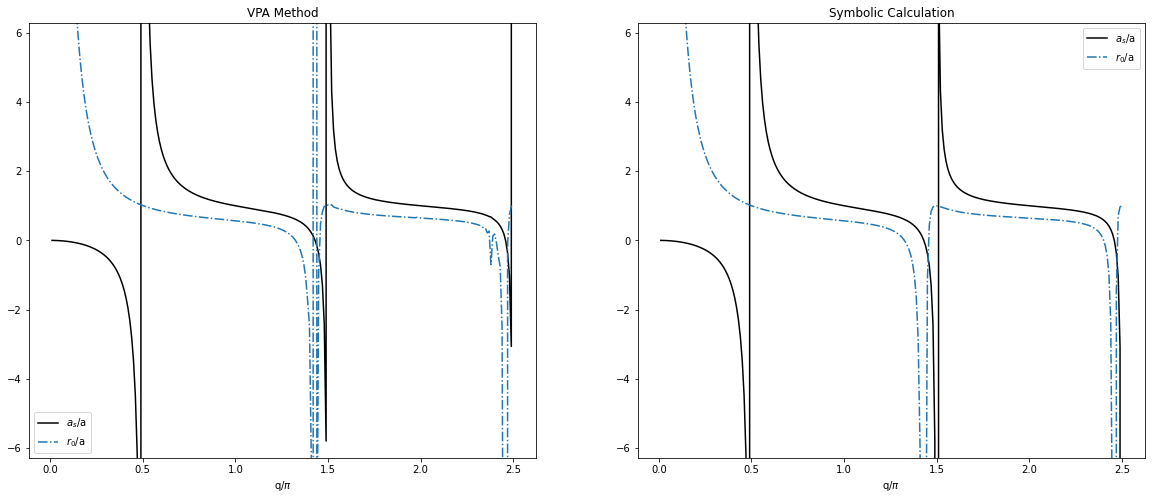

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
x = [0.01*(i+1) for i in range(n)]

ax[0].set_title("VPA Method")
ax[0].set_ylim([-2*np.pi, 2*np.pi])
ax[0].plot(x, a_s_arry_vpa, 'k', label="$a_s$/a")
ax[0].plot(x, r_0_arry_vpa, '-.', label="$r_0$/a")
ax[0].legend(loc='best');
ax[0].set_xlabel("q/$\pi$")

ax[1].set_title("Symbolic Calculation")
ax[1].set_ylim([-2*np.pi, 2*np.pi])
ax[1].plot(x, a_s_arry_sym, 'k', label="$a_s$/a")
ax[1].plot(x, r_0_arry_sym, '-.', label="$r_0$/a")
ax[1].legend(loc='best')
ax[1].set_xlabel("q/$\pi$")

Text(0.5, 0, 'q/$\\pi$')

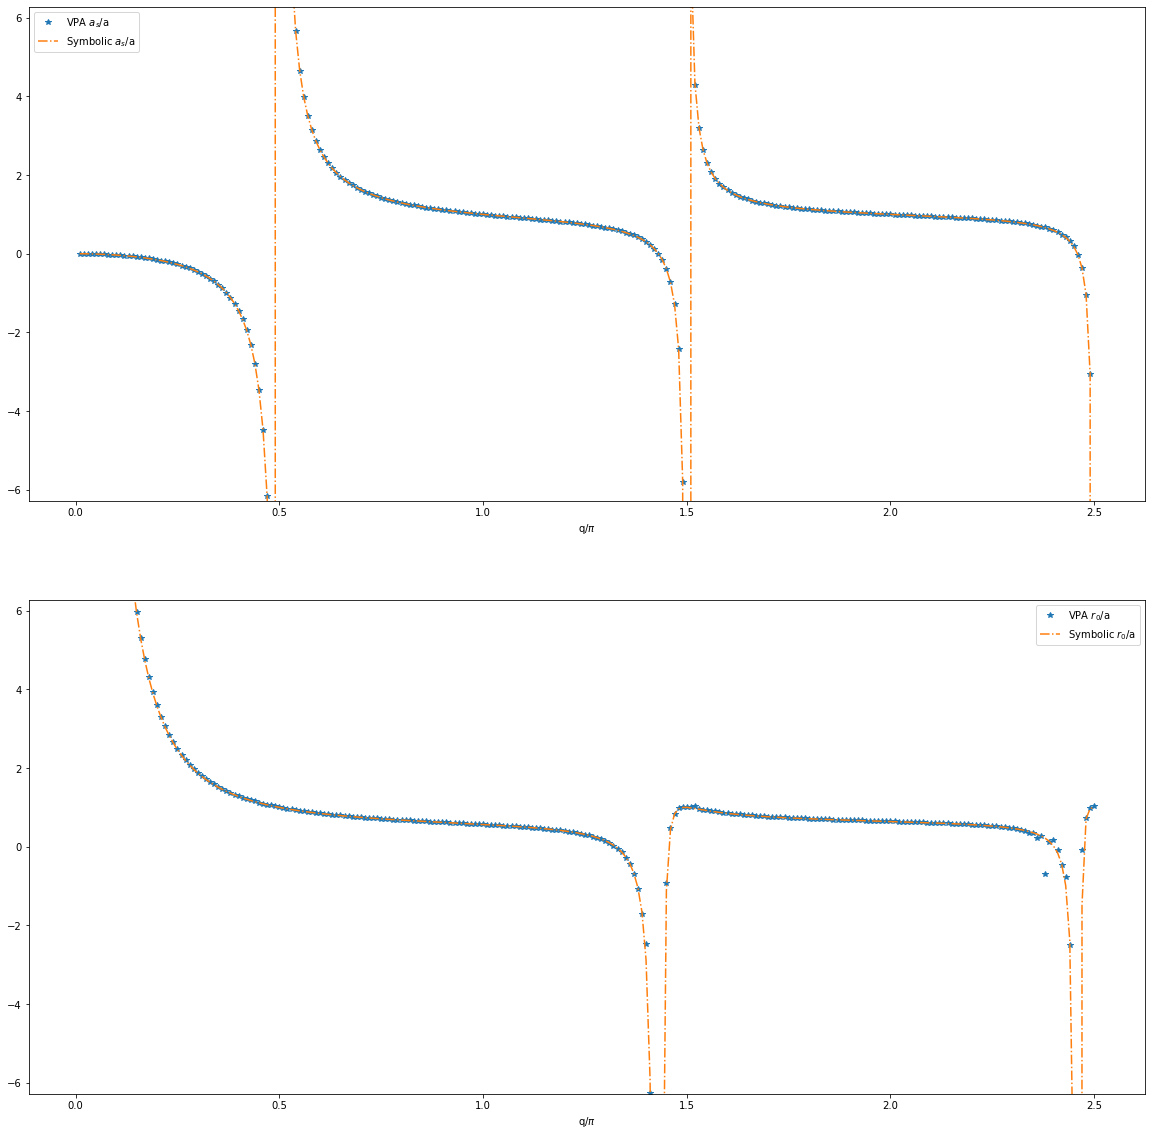

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
x = [0.01*(i+1) for i in range(n)]

# ax[0].set_title("VPA Method")
ax[0].set_ylim([-2*np.pi, 2*np.pi])
ax[0].plot(x, a_s_arry_vpa, '*', label="VPA $a_s$/a")
ax[0].plot(x, a_s_arry_sym, '-.', label="Symbolic $a_s$/a")
ax[0].legend(loc='best');
ax[0].set_xlabel("q/$\pi$")

# ax[1].set_title("Symbolic Calculation")
ax[1].set_ylim([-2*np.pi, 2*np.pi])
ax[1].plot(x, r_0_arry_vpa, '*', label="VPA $r_0$/a")
ax[1].plot(x, r_0_arry_sym, '-.', label="Symbolic $r_0$/a")
ax[1].legend(loc='best')
ax[1].set_xlabel("q/$\pi$")